In [1]:
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.morphology import disk
import cv2
import numpy as np

from image_generator import generate_binary_image_with_border_crossing_lines, add_varying_intensity_noise
from hough import hough_cv, hough

In [2]:
binary_image = generate_binary_image_with_border_crossing_lines()
noisy_image = add_varying_intensity_noise(binary_image, max_noise_level=0.35)

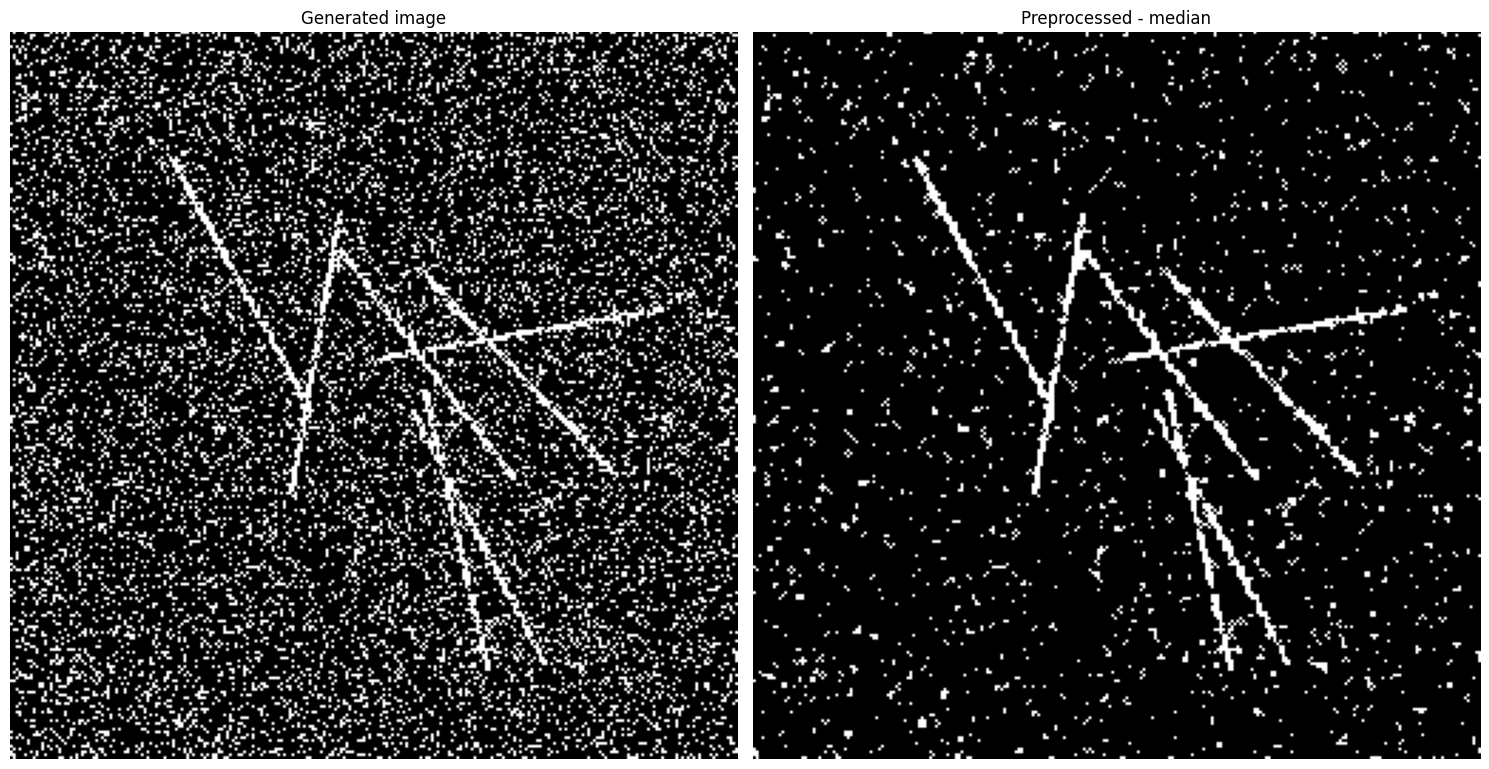

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(noisy_image * 255, cmap='gray')
axs[0].axis('off')
axs[0].set_title("Generated image")

output_median = median(noisy_image * 255, disk(1))
output_median_rgb = cv2.cvtColor(output_median.astype(np.uint8), cv2.COLOR_GRAY2BGR)
axs[1].imshow(output_median_rgb, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Preprocessed - median")

fig.tight_layout()
plt.show()

In [4]:
line_image = np.copy(output_median_rgb)
lines = hough(output_median // 255, rho=1, theta=np.pi/180, threshold=60, min_line_length=10, max_line_gap=5)

for x1,y1,x2,y2 in lines:
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),2)

In [5]:
line_image_cv2 = np.copy(output_median_rgb) #creating an image copy to draw lines on
lines = hough_cv(output_median // 255, rho=1, theta=np.pi/180, threshold=60, min_line_length=10, max_line_gap=5)

for x1,y1,x2,y2 in lines:
    try:
        cv2.line(line_image_cv2,(x1,y1),(x2,y2),(255,0,0),2)
    except:
        print("Invalid line")

Comparing to OpenCV implementation

In [6]:
line_image_cv2_p = np.copy(output_median_rgb)
lines = cv2.HoughLinesP(output_median // 255, rho=1, theta=np.pi/180, threshold=30, minLineLength=5)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image_cv2_p,(x1,y1),(x2,y2),(255,0,0),2)

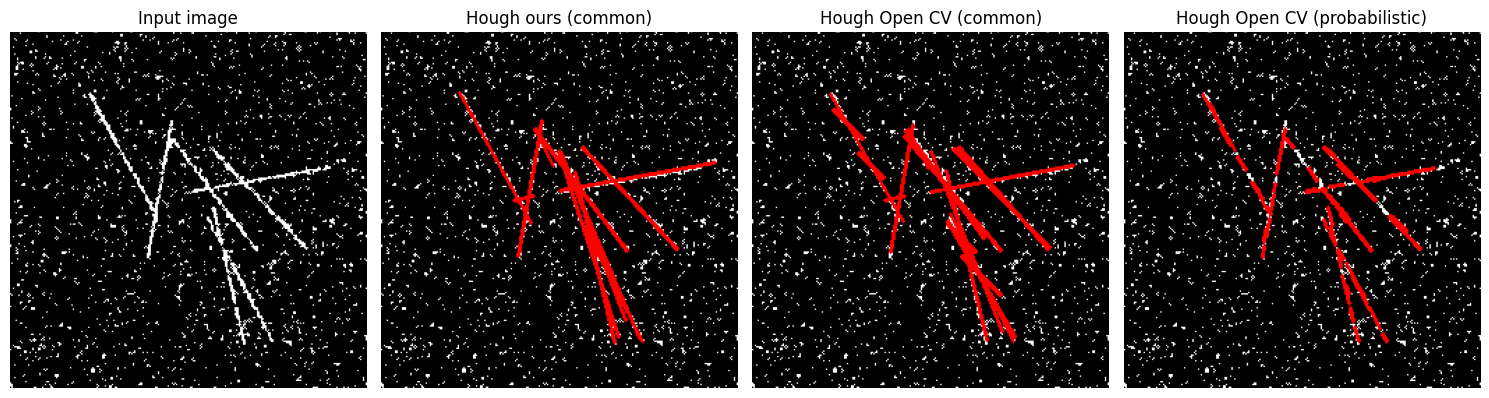

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(15, 10))

axs[0].imshow(output_median_rgb, cmap='gray')
axs[0].axis('off')
axs[0].set_title("Input image")

axs[1].imshow(line_image, cmap='gray')
axs[1].axis('off')
axs[1].set_title("Hough ours (common)")

axs[2].imshow(line_image_cv2, cmap='gray')
axs[2].axis('off')
axs[2].set_title("Hough Open CV (common)")

axs[3].imshow(line_image_cv2_p, cmap='gray')
axs[3].axis('off')
axs[3].set_title("Hough Open CV (probabilistic)")

fig.tight_layout()
plt.show()